# <a>Live 09 - Gráficos com Seaborn</a>

Ahhh, Seaborn, como você me faz feliz! <3

Um bocado mais bonito que Matplotlib, o Seaborn tem uma integração interessante com o pandas. Ele possui facilidades para customizar o visual com estilos e paletas que o tornam bem práticos.

Por fim, ainda tem umas bases de dados para brincarmos e testarmos. As bases ficam nesse [repositório](https://github.com/mwaskom/seaborn-data)

Vamos para o mão na massa



In [1]:
from matplotlib import pyplot as plt
import seaborn as sns # Oi??? Por que sns?
import pandas as pd
import numpy as np

### <a> Buscando bases de exemplo </a>

As bases ficam nesse [repositório](https://github.com/mwaskom/seaborn-data). Basta passar o nome sem o ".csv"


In [2]:
# Buscando as bases
voos = sns.load_dataset("flights")
voos.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
acidentes = sns.load_dataset("car_crashes")
acidentes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### <a> Gráfico de Linha </a>

In [5]:
df_bitcoin = pd.read_csv('https://datahub.io/cryptocurrency/bitcoin/r/bitcoin.csv')
df_bitcoin.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [6]:
df_bitcoin.shape

(3605, 16)

In [7]:
df_bitcoin['price(USD)'].tail(20)

3585    6387.24
3586    6365.47
3587    6363.62
3588    6433.38
3589    6468.50
3590    6522.27
3591    6442.60
3592    6386.13
3593    6413.63
3594    6411.76
3595    6373.19
3596    6351.24
3597    5736.15
3598    5645.32
3599    5578.58
3600    5559.74
3601    5620.78
3602    4863.93
3603    4465.54
3604    4611.57
Name: price(USD), dtype: float64

In [8]:
df_bitcoin = df_bitcoin.tail(20)

<AxesSubplot:xlabel='date', ylabel='price(USD)'>

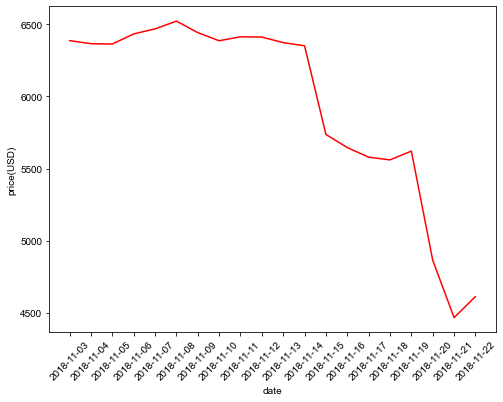

In [9]:
plt.figure(figsize=(8,6)) # Uai, mas isso não é matplotlib?
plt.xticks(rotation=45) # E isso também??
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_bitcoin, x='date', y='price(USD)', color='red')

### <a> Gráfico de Barras </a>

In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df_por_sexo = titanic.groupby('sex')['survived'].sum().reset_index()
df_por_sexo

,sex,survived
0,female,233
1,male,109


<AxesSubplot:xlabel='sex', ylabel='survived'>

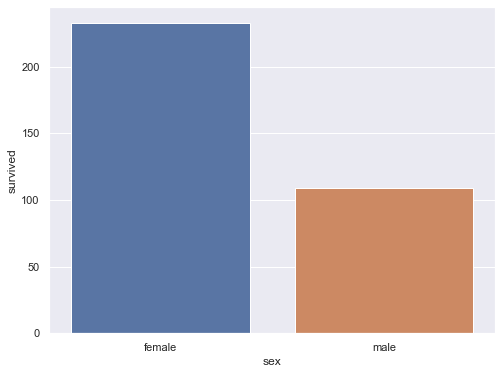

In [12]:
plt.figure(figsize=(8,6)) # Uai, mas isso não é matplotlib?
sns.barplot(data=df_por_sexo, x='sex', y='survived')

### <a> Histograma </a>

<AxesSubplot:xlabel='age', ylabel='Count'>

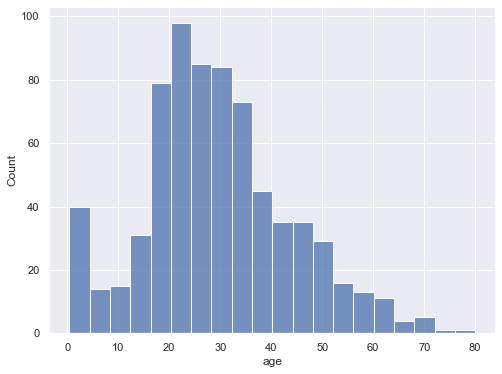

In [13]:
plt.figure(figsize=(8,6)) # Uai, mas isso não é matplotlib?
sns.histplot(data=titanic, x='age')

### <a> Boxplot </a>

In [14]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [15]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
df_titanic = titanic.dropna()

In [17]:
df_titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
idades_com_outlier = list(df_titanic['age'])
idades_com_outlier.append(120)

In [19]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


<AxesSubplot:xlabel='age'>

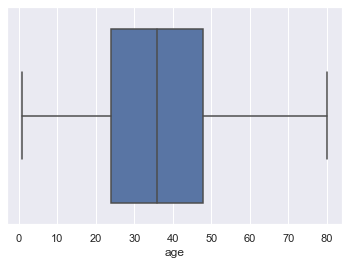

In [20]:
sns.boxplot(data=df_titanic, x='age')

<AxesSubplot:>

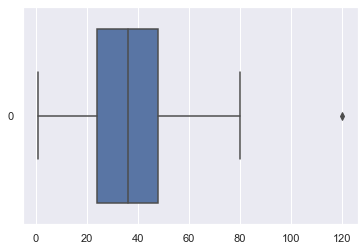

In [21]:
sns.boxplot(data=idades_com_outlier, orient='h')

### <a> Mapas de calor (heatmap) </a>

In [22]:
voos.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [23]:
voos = voos.pivot("month", "year", "passengers")
voos.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

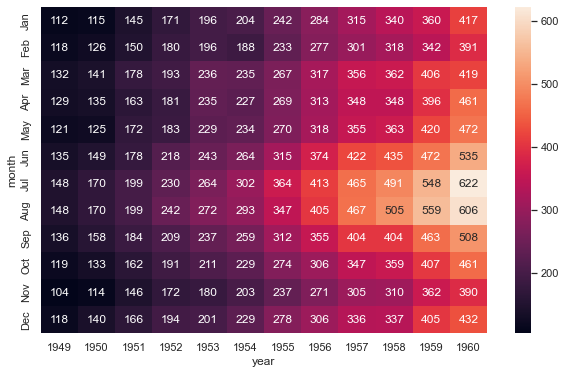

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(voos, annot=True, fmt='.0f')

<AxesSubplot:xlabel='year', ylabel='month'>

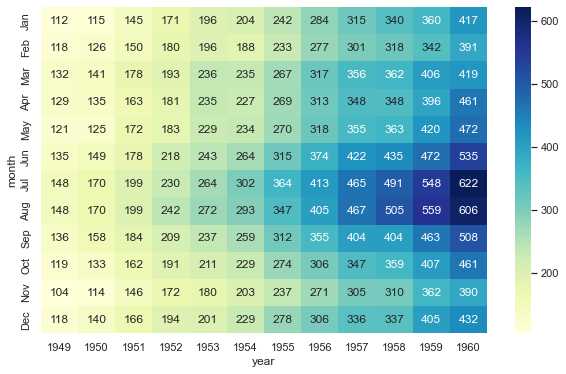

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(voos, annot=True, fmt='.0f', cmap="YlGnBu")

<AxesSubplot:xlabel='year', ylabel='month'>

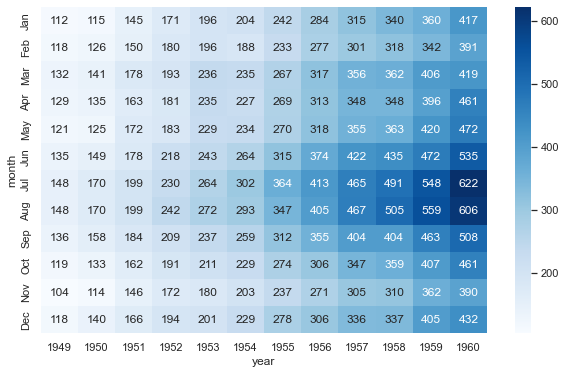

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(voos, annot=True, fmt='.0f', cmap="Blues")

### <a> Gráfico de dispersão com regressão linear </a>

In [27]:
acidentes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


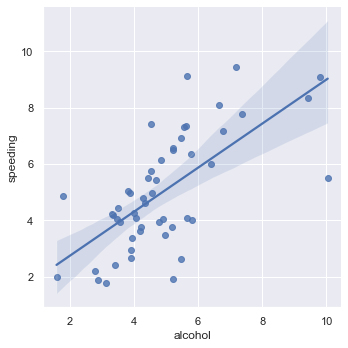

In [28]:
sns.lmplot(data=acidentes, x='alcohol', y='speeding')

### <a> Seaborn com Matplotlib </a>

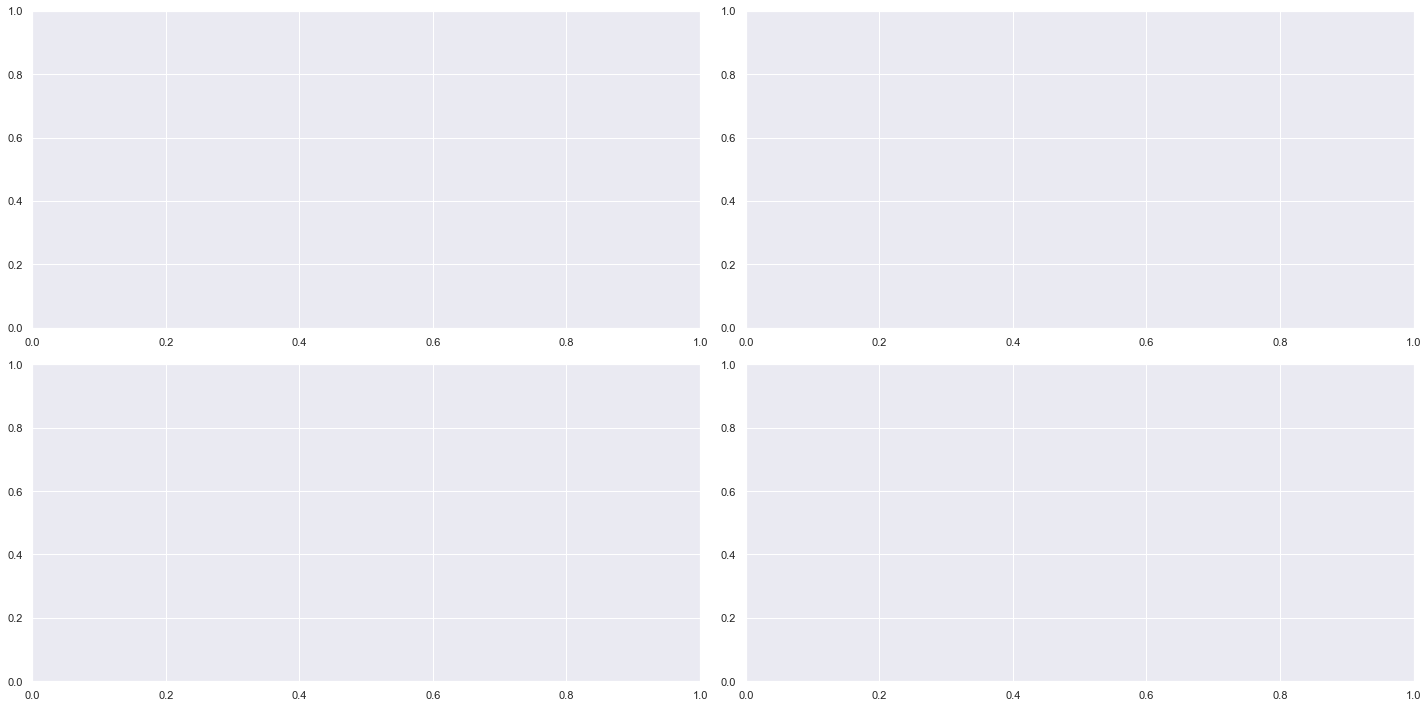

In [29]:
janela, graficos = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
plt.tight_layout()

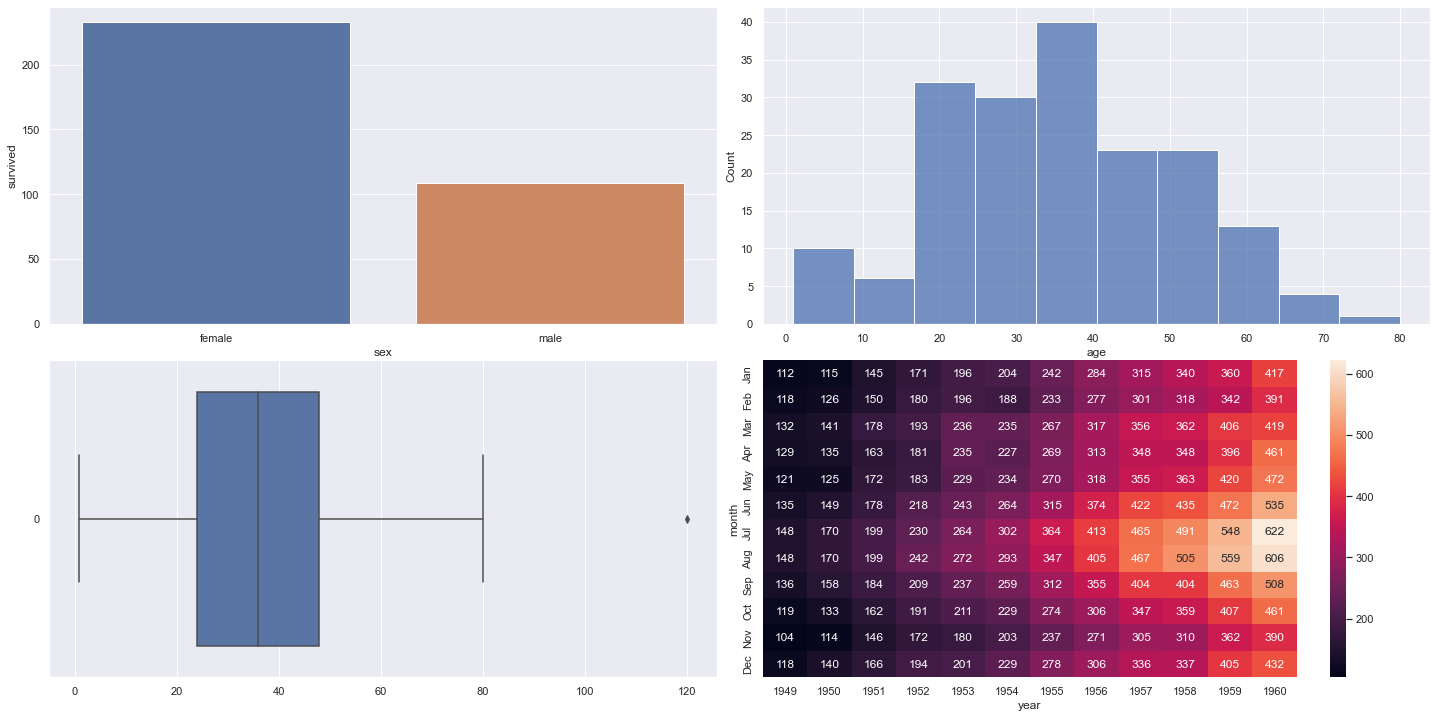

In [30]:
sns.barplot(data=df_por_sexo, x='sex', y='survived', ax=graficos[0][0])
sns.histplot(data=df_titanic, x='age', ax=graficos[0][1])
sns.boxplot(data=idades_com_outlier, orient='h', ax=graficos[1][0])
sns.heatmap(voos, annot=True, fmt='.0f', ax=graficos[1][1])

janela